In [1]:
import os
import numpy as np
import cv2 as cv
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt


In [2]:
def load_and_preprocess_images(train_path):
    categories = os.listdir(train_path)
    data = []
    for category in categories:
        label = categories.index(category)
        path = os.path.join(train_path, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            try:
                img_array = cv.imread(img_path)
                img_resized = cv.resize(img_array, (200, 200))
                image = np.array(img_resized).flatten()
                data.append([image, label])
                print("success load image from", img_path)
            except Exception as e:
                print("error load image from", img_path)
                pass
    return data, categories


In [3]:
def save_data_to_pickle(data, filename):
    with open(filename, 'wb') as pick:
        pickle.dump(data, pick)
    print("success save data image")


In [4]:
def load_data_from_pickle(filename):
    with open(filename, 'rb') as pick:
        return pickle.load(pick)


In [5]:
def prepare_features_and_labels(data):
    features, labels = [], []
    for feature, label in data:
        features.append(feature)
        labels.append(label)
    return np.array(features), np.array(labels)

In [6]:
def train_model(x_train, y_train, c=1, kernel='poly', gamma='auto'):
    model = SVC(C=c, kernel=kernel, gamma=gamma)
    model.fit(x_train, y_train)
    print("Model training completed")
    return model

In [7]:
def save_model(model, filename):
    with open(filename, 'wb') as pick:
        pickle.dump(model, pick)
    print("Model saved")

In [8]:
def load_model(filename):
    with open(filename, 'rb') as pick:
        return pickle.load(pick)

In [9]:
def display_prediction_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

success load image from dataset\TTD aqilah\IMG_20241212_123650.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123703.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123714.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123729.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123743.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123757.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123813.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123826.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123842.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123857.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123909.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123923.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123935.jpg
success load image from dataset\TTD aqilah\IMG_20241212_123946.jpg
success load image from dataset\TTD aqilah\IMG_20241212_124005

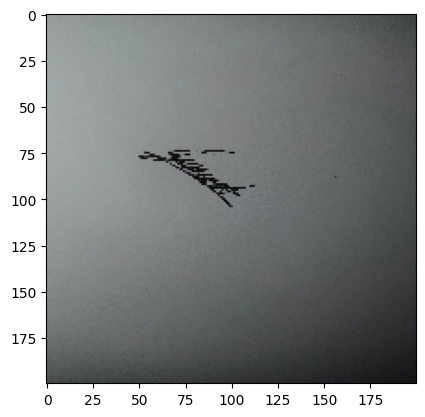

In [10]:
def main():
    train_path = r'dataset'

    data, categories = load_and_preprocess_images(train_path)
    save_data_to_pickle(data, 'dataImage.pickle')

    data = load_data_from_pickle('dataImage.pickle')
    features, labels = prepare_features_and_labels(data)

    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.1)
    model = train_model(x_train, y_train)

    save_model(model, 'model.sav')
    model = load_model('model.sav')

    accuracy = model.score(x_test, y_test)
    print("Model accuracy:", accuracy)

    prediction = model.predict(x_test)
    print("Prediction:", categories[prediction[0]])

    my_sign = x_test[0].reshape(200, 200, 3)
    display_prediction_image(my_sign)

if __name__ == "__main__":
    main()